In [1]:
import polars
import os
import numpy as np
import torch, torchvision
from torchvision.utils import make_grid
from glio.loaders import nifti
from glio.python_tools import get_all_files
from glio.jupyter_tools import clean_mem
import matplotlib.pyplot as plt

In [2]:
path = r"E:\dataset\PKG - UPENN-GBM-NIfTI\UPENN-GBM"
os.listdir(path)

['NIfTI-files',
 'radiology_mapping.csv',
 'radiomic_features_CaPTk',
 'UPENN-GBM_acquisition.csv',
 'UPENN-GBM_CaPTk_fe_params.csv',
 'UPENN-GBM_CaPTk_radiomic_features_list.csv',
 'UPENN-GBM_clinical_info_v2.1.csv',
 'UPENN-GBM_data_availability.csv']

In [3]:
polars.read_csv(f"{path}/UPENN-GBM_clinical_info_v2.1.csv", null_values = ["Not Available", "NA"])

ID,Gender,Age_at_scan_years,Survival_from_surgery_days_UPDATED,Survival_Status,Survival_Censor,IDH1,MGMT,KPS,GTR_over90percent,Time_since_baseline_preop,PsP_TP_score
str,str,f64,i64,str,i64,str,str,i64,str,i64,i64
"""UPENN-GBM-0000…","""F""",52.16,960,"""Deceased""",null,"""Wildtype""",null,null,"""Y""",0,null
"""UPENN-GBM-0000…","""F""",61.3,291,"""Deceased""",null,"""Wildtype""",null,null,"""Y""",0,null
"""UPENN-GBM-0000…","""M""",42.82,2838,"""Deceased""",null,"""Wildtype""",null,null,"""Y""",0,null
"""UPENN-GBM-0000…","""M""",33.43,623,"""Deceased""",null,"""NOS/NEC""",null,null,"""Y""",0,null
"""UPENN-GBM-0000…","""M""",53.33,1143,"""Deceased""",null,"""Wildtype""",null,null,"""Y""",0,null
…,…,…,…,…,…,…,…,…,…,…,…
"""UPENN-GBM-0062…","""F""",57.19,288,"""Deceased""",null,"""Wildtype""","""Unmethylated""",null,"""Not Applicable…",234,5
"""UPENN-GBM-0062…","""F""",57.4,365,"""Deceased""",null,"""Wildtype""",null,null,"""Not Applicable…",null,4
"""UPENN-GBM-0062…","""M""",55.09,79,"""Deceased""",null,"""Wildtype""",null,null,"""Not Applicable…",null,6


In [4]:
{x.split("\\")[-1]: nifti.read(x).shape for x in get_all_files(r"E:\dataset\PKG - UPENN-GBM-NIfTI\UPENN-GBM\NIfTI-files\images_DTI\images_DTI\UPENN-GBM-00001_11")}

{'UPENN-GBM-00001_11_DTI_AD.nii.gz': torch.Size([240, 240, 155]),
 'UPENN-GBM-00001_11_DTI_FA.nii.gz': torch.Size([240, 240, 155]),
 'UPENN-GBM-00001_11_DTI_RD.nii.gz': torch.Size([240, 240, 155]),
 'UPENN-GBM-00001_11_DTI_TR.nii.gz': torch.Size([240, 240, 155])}

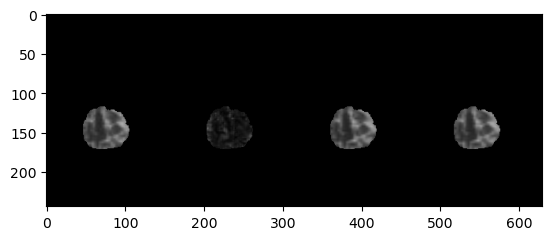

In [5]:
images = [nifti.read(x) for x in get_all_files(r"E:\dataset\PKG - UPENN-GBM-NIfTI\UPENN-GBM\NIfTI-files\images_DTI\images_DTI\UPENN-GBM-00001_11")]
images = [i - i.min() for i in images]
images = [i / i.max() for i in images]
plt.imshow(make_grid([i[60].unsqueeze(0) for i in images]).permute(1,2,0))

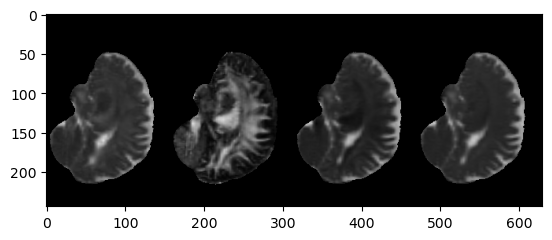

In [6]:
plt.imshow(make_grid([i[100].unsqueeze(0) for i in images]).permute(1,2,0))

UPENN-GBM-00001_11; UPENN-GBM-00011_11; UPENN-GBM-00021_11; UPENN-GBM-00031_11; UPENN-GBM-00040_11; UPENN-GBM-00048_11; UPENN-GBM-00055_21; UPENN-GBM-00065_11; UPENN-GBM-00075_11; UPENN-GBM-00084_21; UPENN-GBM-00092_11; UPENN-GBM-00102_11; UPENN-GBM-00112_11; UPENN-GBM-00122_11; UPENN-GBM-00129_21; UPENN-GBM-00137_11; UPENN-GBM-00145_11; UPENN-GBM-00152_11; UPENN-GBM-00162_11; UPENN-GBM-00172_11; UPENN-GBM-00182_11; UPENN-GBM-00192_11; UPENN-GBM-00201_11; UPENN-GBM-00211_11; UPENN-GBM-00220_11; UPENN-GBM-00230_11; UPENN-GBM-00240_11; UPENN-GBM-00250_11; UPENN-GBM-00260_11; UPENN-GBM-00269_11; UPENN-GBM-00280_21; UPENN-GBM-00291_11; UPENN-GBM-00302_21; UPENN-GBM-00312_11; UPENN-GBM-00323_11; UPENN-GBM-00336_11; UPENN-GBM-00349_11; UPENN-GBM-00355_21; UPENN-GBM-00365_11; UPENN-GBM-00375_11; UPENN-GBM-00385_11; UPENN-GBM-00395_11; UPENN-GBM-00407_11; UPENN-GBM-00418_11; UPENN-GBM-00428_11; UPENN-GBM-00438_11; UPENN-GBM-00449_11; UPENN-GBM-00460_11; UPENN-GBM-00470_11; UPENN-GBM-00492_11; 

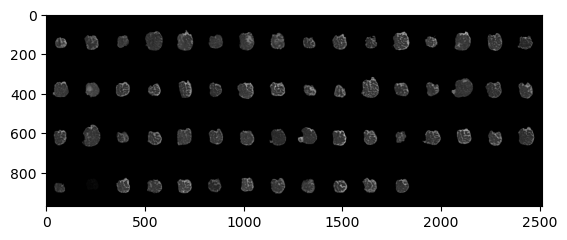

In [7]:
clean_mem()
step = 1
files = get_all_files(r"E:\dataset\PKG - UPENN-GBM-NIfTI\UPENN-GBM\NIfTI-files\images_DTI\images_DTI", path_filter=lambda x: "DTI_AD" in x)[::10]
images = [(nifti.read(x), print(x.split("\\")[-2], end = "; "))[0] for x in files]
images = [i - i.min() for i in images]
images = [i / i.max() for i in images]
plt.imshow(make_grid([i[60].unsqueeze(0) for i in images], nrow = 16).permute(1, 2, 0))

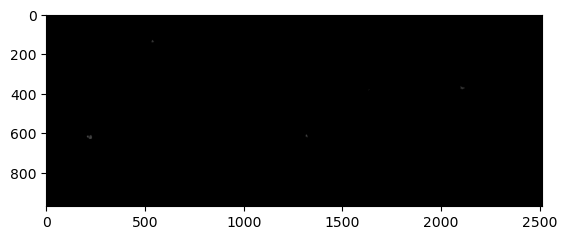

In [8]:
plt.imshow(make_grid([i[44].unsqueeze(0) for i in images], nrow = 16).permute(1, 2, 0))

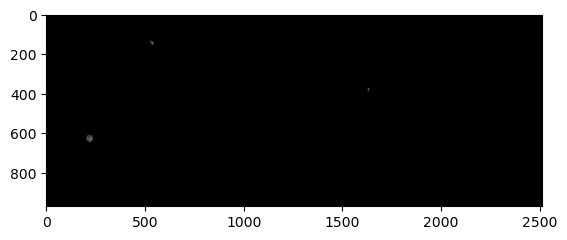

In [9]:
plt.imshow(make_grid([i[191].unsqueeze(0) for i in images], nrow = 16).permute(1, 2, 0))

In [10]:
images_reduce1 = torch.stack([i[44:191] for i in images])
images_reduce1 = torch.permute(images_reduce1, (0, 2, 3, 1))

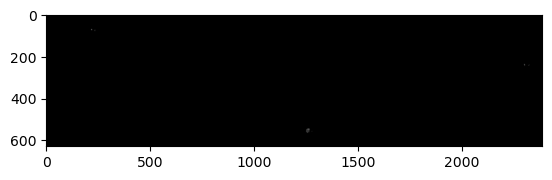

In [11]:
plt.imshow(make_grid([i[36].unsqueeze(0) for i in images_reduce1], nrow = 16).permute(1, 2, 0))

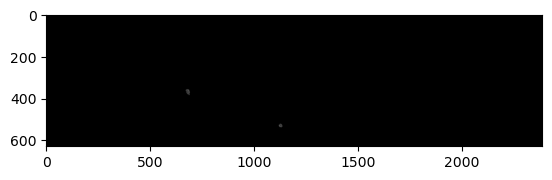

In [12]:
plt.imshow(make_grid([i[222].unsqueeze(0) for i in images_reduce1], nrow = 16).permute(1, 2, 0))

In [13]:
images_reduce2 = torch.stack([i[36:222] for i in images_reduce1])
images_reduce2 = torch.permute(images_reduce2, (0, 2, 3, 1))

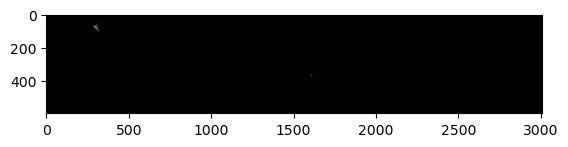

In [14]:
plt.imshow(make_grid([i[2].unsqueeze(0) for i in images_reduce2], nrow = 16).permute(1, 2, 0))

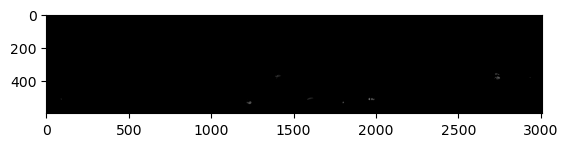

In [15]:
plt.imshow(make_grid([i[141].unsqueeze(0) for i in images_reduce2], nrow = 16).permute(1, 2, 0))

In [16]:
images_reduce3 = torch.stack([i[2:141] for i in images_reduce1])
images_reduce3 = torch.permute(images_reduce2, (0, 2, 3, 1))